Top Downtime Causes:
 Cause
Electrical Fault    73.28
Engine Failure      73.10
Hydraulic Leak      48.80
Overheating         44.85
Brake Issue         37.59
Sensor Failure      30.34
Name: Downtime_Hours, dtype: float64


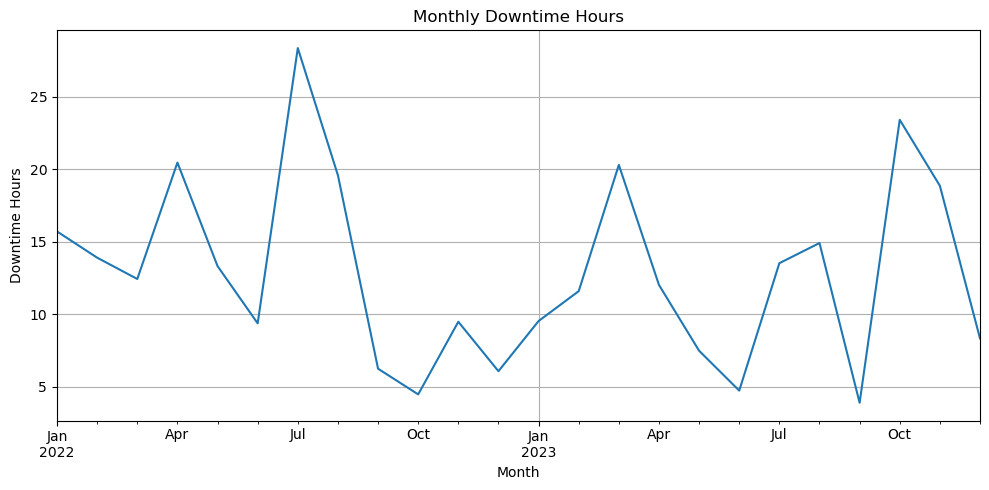

Predicted downtime for 14 hours of operation: 1.57 hours


C:\Users\rntzq\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Load data
df = pd.read_csv("mining_downtime_sample.csv")

# --- Root Cause Summary ---
cause_summary = df.groupby("Cause")["Downtime_Hours"].sum().sort_values(ascending=False)
print("Top Downtime Causes:\n", cause_summary)

# --- Trend Over Time ---
df["Date"] = pd.to_datetime(df["Date"])
df["Month"] = df["Date"].dt.to_period("M")
monthly_downtime = df.groupby("Month")["Downtime_Hours"].sum()

monthly_downtime.plot(figsize=(10, 5), title="Monthly Downtime Hours", xlabel="Month", ylabel="Downtime Hours")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Regression Forecasting ---
model = LinearRegression()
X = df[["Operating_Hours"]]
y = df["Downtime_Hours"]
model.fit(X, y)

# Predict for 14 hours of operation
predicted = model.predict(np.array([[14]]))
print(f"Predicted downtime for 14 hours of operation: {predicted[0]:.2f} hours")
